In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
data_path = 'housing.csv'

df = pd.read_csv(data_path)

In [11]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [12]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [14]:
categorical_columns = set(df.columns) - {'price', 'area'}

for col in categorical_columns:
    df[col] = df[col].astype('category')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             545 non-null    int64   
 1   area              545 non-null    int64   
 2   bedrooms          545 non-null    category
 3   bathrooms         545 non-null    category
 4   stories           545 non-null    category
 5   mainroad          545 non-null    category
 6   guestroom         545 non-null    category
 7   basement          545 non-null    category
 8   hotwaterheating   545 non-null    category
 9   airconditioning   545 non-null    category
 10  parking           545 non-null    category
 11  prefarea          545 non-null    category
 12  furnishingstatus  545 non-null    category
dtypes: category(11), int64(2)
memory usage: 16.2 KB


In [16]:
df['price'] = df['price'] / 1000000
df['area'] = df['area'] / 1000

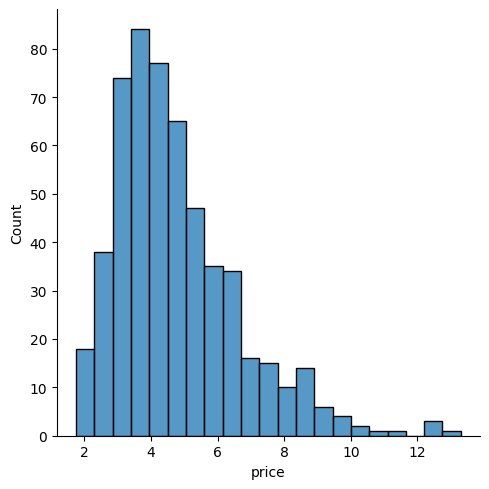

In [17]:
## The plot shows that the proportion of prices between 2M and 8M is higher than other prices
## The plot shows that the data distribution is not normal distribution

sns.displot(
    data=df,
    x='price'
)

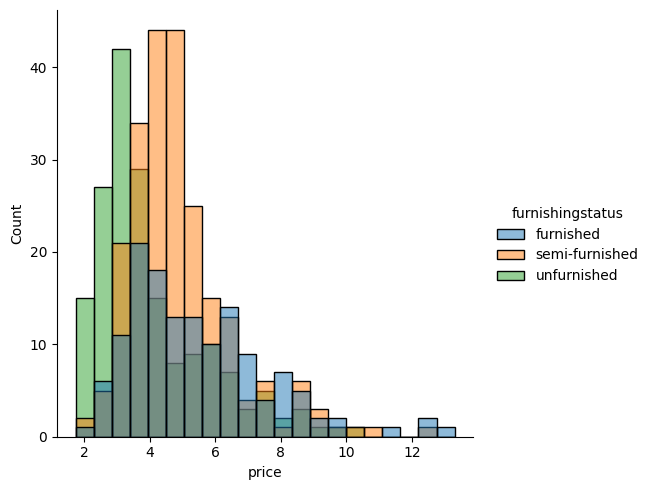

In [18]:
## The state of furnishing is related to the price

sns.displot(
    data=df,
    x='price',
    hue='furnishingstatus',
)

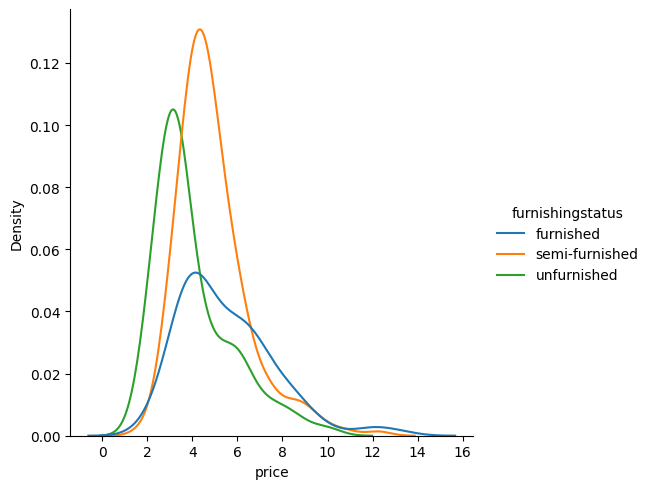

In [19]:
## It seems the highest prices belong to furnished houses.

sns.displot(
    data=df,
    x='price',
    kind='kde',
    hue='furnishingstatus',
)

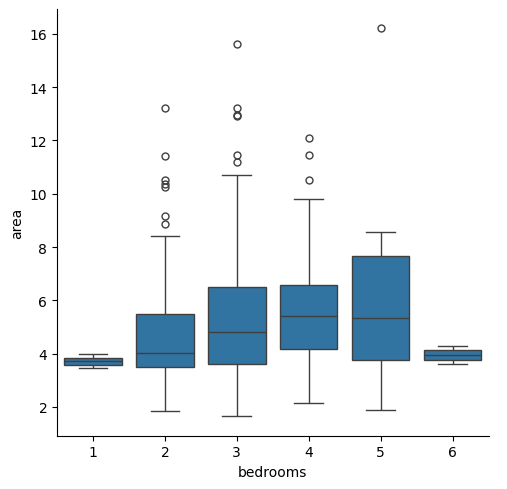

In [20]:
## The number of one-bedroom houses appears to be less than what would be considered normal
## suggesting potential issues with the data at this stage

#################################################################################################################
## For machine learning purposes:                                                                              ##
## it is recommended to completely remove data pertaining to 1-bedroom and 6-bedroom rooms from this dataset.  ##
#################################################################################################################
sns.catplot(
    data=df,
    kind='box',
    x='bedrooms',
    y='area'
)

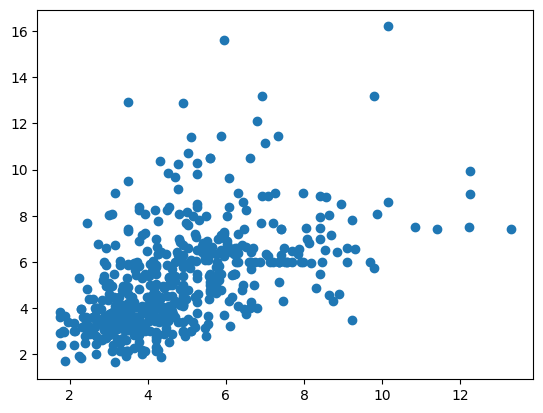

In [21]:
## While price and area show a correlation in the lower price ranges
## this relationship appears to deteriorate at higher prices

plt.scatter(x=df['price'], y=df['area'])

<Axes: xlabel='area', ylabel='price'>

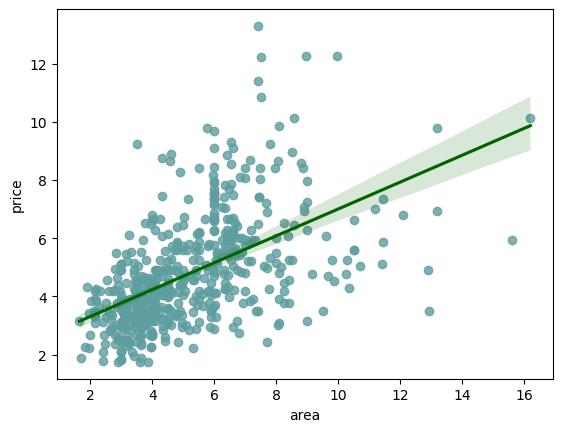

In [22]:
## The regression indicates that the data displays high variance

sns.regplot(
    data=df,
    x='area',
    y='price',
    color='cadetblue',
    line_kws={'color': 'darkgreen'},
)


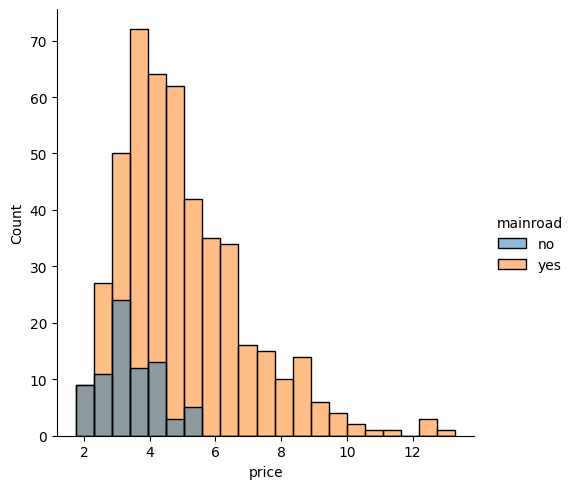

In [23]:
## Histogram of house prices by mainroad status showing that
## homes on the main road dominate counts and extend to higher prices

sns.displot(
    data=df,
    x='price',
    hue='mainroad',
)

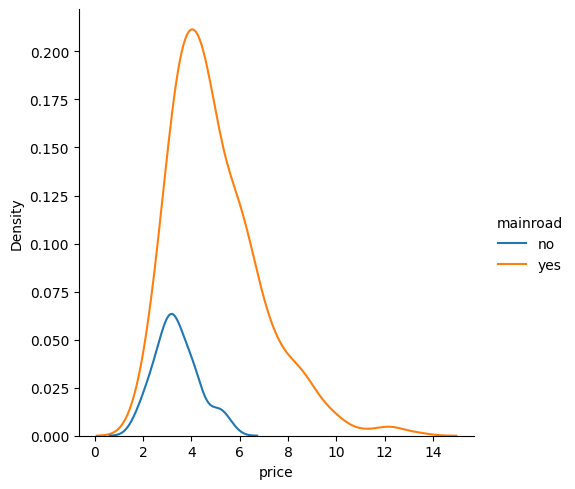

In [24]:
sns.displot(
    data=df,
    x='price',
    kind='kde',
    hue='mainroad',
)

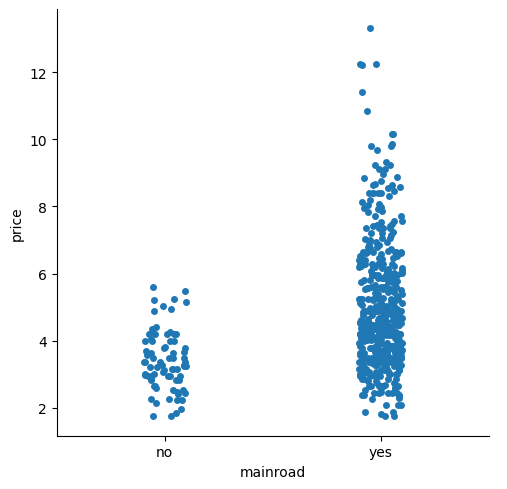

In [25]:
sns.catplot(
    data=df,
    x='mainroad',
    y='price',
    kind='strip',
)

In [26]:
for col in categorical_columns:
    df[col] = df[col].cat.codes

<Axes: >

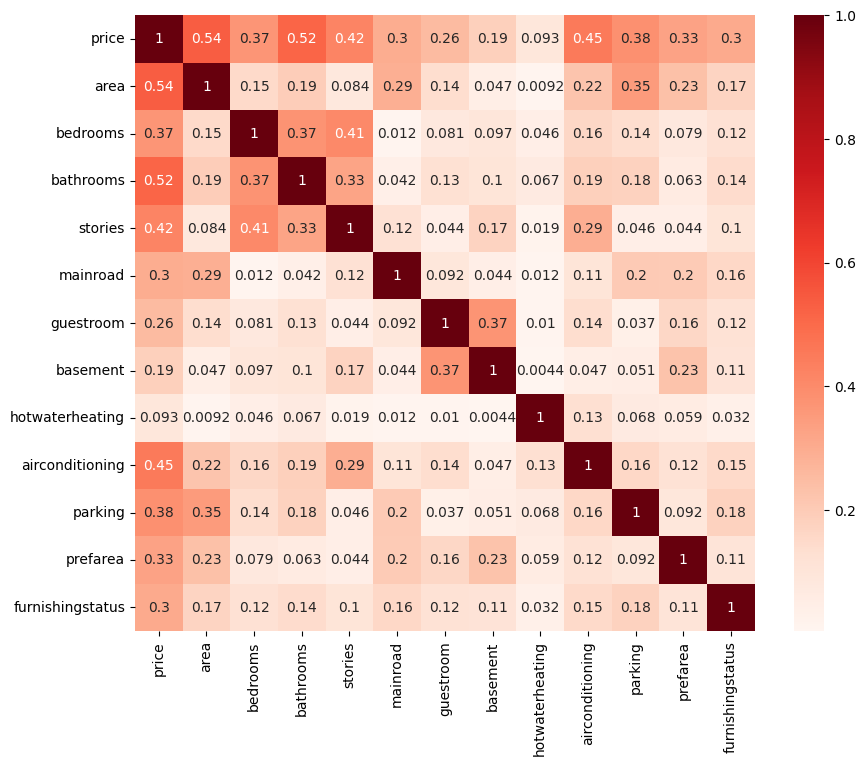

In [27]:
## We can see the correlation of all features with each other.

plt.figure(figsize=(10, 8))
sns.heatmap(
    abs(df.corr()),
    annot=True,
    cmap='Reds',
)